# Predicción precios inmuebles

## Problema: 

En esta prueba se busca evaluar la capacidad de analizar una base de datos, realizar las transformaciones necesarias, generar un modelo predictivo y evaluar su rendimiento. Para esto se usará una base de datos de ofertas inmobiliarias con variables de la propiedad, variables de las zona, y algunas variables de cercanias a colegios y farmacias. La base se encuentra disponible en LINK y contiene las variables.

## Objetivo general:
    
Predecir el precio de oferta de la propiedad a partir del resto de las variables seleccionadas, pudiendose crear más variables si así lo estiman necesario.

### Solución al problema: 

Se limpiaron los datos, se cambiaron las variables categóricas a numéricas para luego quedarnos sólo con las numéricas y eliminar las columnas que no aportaban información. Una vez se obtuvieron columnas numéricas se utilizaron distintos tipos de gráficos para realizar un análisis exploratorio de los datos (EDA) y con eso entender de mejor forma los datos y cómo se relacionan las variables con la columna 'precio_f'. Por medio de la matriz de correlación se encontró linealidad en los datos y usando PCA (análisis de componentes principales) se encontró que todos los datos aportan la misma información al problema. Como es un problema de regresión, se utilizaron modelos de regresiones para predecir el precio (un modelo de regresión lineal y 3 de ensemble). Para nuestro caso se probaron distintos modelos y el que mejor rendimiento tuvo fue XGBRegressor con un error del 8.05% para la métrica R2 y 8.04%explained variance score. Finalmente, se simuló un caso nuevo, con nuevos registros para ver la predicción del precio, este fue de 1.99e+08.

## Descripción de las variables:

* ID_LOCALIDAD: ID de la división administrativa LOCALIDAD
* ID_DISTRITO: ID de la división administrativa DISTRITO
* ID_COMUNA: ID de la división administrativa COMUNA
* lat: Latitud
* lng: Longitud
* precio_f: Precio de oferta de la propiedad
* region: Región donde se encuentra la propiedad
* tipo: Tipo de propiedad
* direccion: Dirección
* descripcion: Descripción
* sup_total: Superficie Total
* sup_util: Superficie Útil
* dormitorios: Dormitorios
* banos: Baños
* antiguedad: Antigüedad
* bodegas: Bodegas
* min_dist_col: Distancia mínima a un colegio
* n_col: Número de colegios a 1 kilometro
* mean_dist_col: Distancia promedio a los colegios cercanos
* min_dist_farm: Distancia mínima a una farmacia
* n_farm: Número de farmacias a 1 kilometro
* mean_dist_farm: Distancia promedio a farmacias cercanas
* RH_PERLLEG4: % de personas en la zona de la propiedad que si nació en otro país, llegó antes de 1990
* CNV_MONPAGVIVP: Promedio Monto de pago por concepto de arriendo o dividendo en la zona de la propiedad
* CNH_INGTOTP: Promedio del ingreso total del hogar corregido en la zona de la propiedad
* CNRH_INGOCUP: Promedio del ingreso ocupación principal

## 1. Lectura e inspección de base

Primero se deberá leer el archivo y verificar la cantidad de registros, variables y el formato de estas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np

In [2]:
df=pd.read_csv('base_prueba.csv', sep=';')
pd.set_option("display.max_columns", None)
df.head()

,ID_LOCALIDAD,ID_DISTRITO,ID_COMUNA,lat,lng,precio_f,region,tipo,direccion,descripcion,sup_total,sup_util,dormitorios,banos,antiguedad,bodegas,min_dist_col,n_col,mean_dist_col,min_dist_farm,n_farm,mean_dist_farm,RH_PERLLEG4,CNV_MONPAGVIVP,CNH_INGTOTP,CNRH_INGOCUP
0,6101011001,610101,6101,6.217611e+06,339568.959064,410000000.0,bernardo-ohiggins,casa,San Ramon,Nieny Vende hermosa parcela de 5 000 mts2 ...,5000.0,180.0,4.0,2.0,NaN,NaN,89.873939,10,525.003210,112.960689,10,409.401279,0.002729,182798.16,1025098.46,588102.78
1,6101011001,610101,6101,6.217611e+06,339569.178969,186657380.0,bernardo-ohiggins,casa,El Olivar 1 Casa 2,Estupenda casa con lindo jard n piscina ...,3850.0,260.0,4.0,3.0,NaN,NaN,90.242446,10,525.044718,113.333612,10,409.654368,0.002729,182798.16,1025098.46,588102.78
2,6101031001,610103,6101,6.217980e+06,338698.268899,35000000.0,bernardo-ohiggins,casa,Altazor 01620,Casa de dos pisos con muy buenas ampliacio...,120.0,98.0,3.0,1.0,NaN,NaN,621.683357,5,771.829938,112.930782,10,575.718592,0.004479,158218.36,759789.81,373339.76
3,6101031001,610103,6101,6.217980e+06,338698.268899,55000000.0,bernardo-ohiggins,casa,El Arado 1518,EXCELENTE OPORTUNIDAD DE INVERSI NHermosa p...,110.0,100.0,4.0,2.0,NaN,NaN,621.683357,5,771.829938,112.930782,10,575.718592,0.004479,158218.36,759789.81,373339.76
4,6101031001,610103,6101,6.218012e+06,338689.990298,272806940.0,bernardo-ohiggins,casa,Calle Uni n Obrera Campos,Estupenda casa construcci n completamente ...,1100.0,169.0,4.0,2.0,NaN,NaN,632.800837,5,787.188282,114.359442,10,619.686775,0.004479,158218.36,759789.81,373339.76


In [3]:
print(df.dtypes)

ID_LOCALIDAD        int64
ID_DISTRITO         int64
ID_COMUNA           int64
lat               float64
lng               float64
precio_f          float64
region             object
tipo               object
direccion          object
descripcion        object
sup_total         float64
sup_util          float64
dormitorios       float64
banos             float64
antiguedad        float64
bodegas           float64
min_dist_col      float64
n_col               int64
mean_dist_col     float64
min_dist_farm     float64
n_farm              int64
mean_dist_farm    float64
RH_PERLLEG4       float64
CNV_MONPAGVIVP    float64
CNH_INGTOTP       float64
CNRH_INGOCUP      float64
dtype: object


In [4]:
df.count()

ID_LOCALIDAD      37768
ID_DISTRITO       37768
ID_COMUNA         37768
lat               37768
lng               37768
precio_f          37768
region            37768
tipo              37768
direccion         37734
descripcion       37672
sup_total         37768
sup_util          37600
dormitorios       37617
banos             37514
antiguedad         1149
bodegas            1441
min_dist_col      37768
n_col             37768
mean_dist_col     31558
min_dist_farm     37768
n_farm            37768
mean_dist_farm    28930
RH_PERLLEG4       37768
CNV_MONPAGVIVP    37709
CNH_INGTOTP       37768
CNRH_INGOCUP      37768
dtype: int64

In [5]:
print(df.shape) 

(37768, 26)


### 1.1 
Vemos que el df tiene un total de 37768 filas y 26 columnas. También se obtuvo la cantidad de datos por columna para poder identificar cuáles columnas poseen mayor cantidad de datos NaN ('antiguedad' y 'bodegas'). Por último, por medio de df.head() podemos ver que hay datos de dos tipos: categóricos y numéricos. Por lo que para hacer una estimación de precios y por el tipo de modelo que usaré, pasaremos las variables categóricas a numéricas.

## 2. Análisis descriptivo

Realizar el análisis descriptivo que estimen pertinente de acuerdo al problema descrito. Este debe ayudarles a tomar algunas decisiones sobre que variables servirán, cuales hay que transformar, registros a omitir, etc. Jumbitos extra a visualizaciones útiles e interesantes.


### 2.1 
Antes de pasar las variables categóricas a numéricas, debemos asegurarnos de cuántos tipos de datos existen, una vez hecho esto, pasaremos las columnas categóricas 'tipo' y 'región' a numéricas. Para la columna 'tipo', será 1 en caso de ser 'casa' y 0 en caso contrario. Para 'region' será 1 en caso de ser 'RM' y 0 en caso contrario

In [6]:
df['tipo'].unique()

array(['casa', 'depa'], dtype=object)

In [7]:
df['region'].unique()

array(['bernardo-ohiggins', 'RM'], dtype=object)

In [8]:
df['tipo_num']=np.where(df['tipo']=='casa' ,1, 0)

In [9]:
df['region_num']=np.where(df['region']=='RM' ,1, 0)

### 2.2 
Contamos los valores NaN y cuáles son las columnas que más registros de este tipo (se intentará abarcar la mayoría)

In [10]:
df.isna().sum().sum()

88756

### 2.2 
Existe un total de 88756 registros con valores NaN. Como anteriormente vimos que la mayoria debería estar en las columnas 'antiguedad' y 'bodegas', veremos si esa hipótesis se confirma:

In [11]:
df['antiguedad'].isna().sum()

36619

In [12]:
df['bodegas'].isna().sum()

36327

### 2.2 
Entre ambas columnas tenemos un total de 72946. Siguiendo con la lógica anterior, veremos las columnas que tienen el resto de valores NaN o su mayoría:

In [13]:
df['mean_dist_farm'].isna().sum()

8838

In [14]:
df['mean_dist_col'].isna().sum() 

6210

### 2.3 
Hasta aquí hay 87994 valores NaN, por lo que encontramos la mayoría de estos valores. Debido a que la mayoría está en las columnas 'antiguedad' y 'bodegas' , estas no entregan información del problema, por lo que se usará drop para eliminarlas. Por otra parte, también se eliminarán las columnas 'descripcion', debido a que no hay referencias de si esa descripción es verdadera o falsa, se eliminará 'direccion' debido a que esa información está de manera numérica en  ID_LOCALIDAD, ID_DISTRITO, ID_COMUNA, lat y lng. Se podrían usar variables tipo dummy para 'dirreccion', pero debido a que se quiere usar PCA y la matriz de correlación para obtener más información, para este caso se prioriza la interpretación de las variables. Por último, antes de eliminar las variables categóricas 'tipo' y 'region' para quedarnos solo con columnas numéricas, se realizarán gráficos para poder explicar los datos y luego se eliminarán.

In [15]:
df=df.fillna(0)
df=df.drop(columns=['antiguedad', 'bodegas','descripcion','direccion'])

In [16]:
df.head()

,ID_LOCALIDAD,ID_DISTRITO,ID_COMUNA,lat,lng,precio_f,region,tipo,sup_total,sup_util,dormitorios,banos,min_dist_col,n_col,mean_dist_col,min_dist_farm,n_farm,mean_dist_farm,RH_PERLLEG4,CNV_MONPAGVIVP,CNH_INGTOTP,CNRH_INGOCUP,tipo_num,region_num
0,6101011001,610101,6101,6.217611e+06,339568.959064,410000000.0,bernardo-ohiggins,casa,5000.0,180.0,4.0,2.0,89.873939,10,525.003210,112.960689,10,409.401279,0.002729,182798.16,1025098.46,588102.78,1,0
1,6101011001,610101,6101,6.217611e+06,339569.178969,186657380.0,bernardo-ohiggins,casa,3850.0,260.0,4.0,3.0,90.242446,10,525.044718,113.333612,10,409.654368,0.002729,182798.16,1025098.46,588102.78,1,0
2,6101031001,610103,6101,6.217980e+06,338698.268899,35000000.0,bernardo-ohiggins,casa,120.0,98.0,3.0,1.0,621.683357,5,771.829938,112.930782,10,575.718592,0.004479,158218.36,759789.81,373339.76,1,0
3,6101031001,610103,6101,6.217980e+06,338698.268899,55000000.0,bernardo-ohiggins,casa,110.0,100.0,4.0,2.0,621.683357,5,771.829938,112.930782,10,575.718592,0.004479,158218.36,759789.81,373339.76,1,0
4,6101031001,610103,6101,6.218012e+06,338689.990298,272806940.0,bernardo-ohiggins,casa,1100.0,169.0,4.0,2.0,632.800837,5,787.188282,114.359442,10,619.686775,0.004479,158218.36,759789.81,373339.76,1,0


### 2.4 
Gráficos

### 2.4.1
Este histograma nos muestra que de todos los inmuebles, un 97.2% pertenece a la región metropolitana y un 2.8% a la región Bernardo-Ohiggins

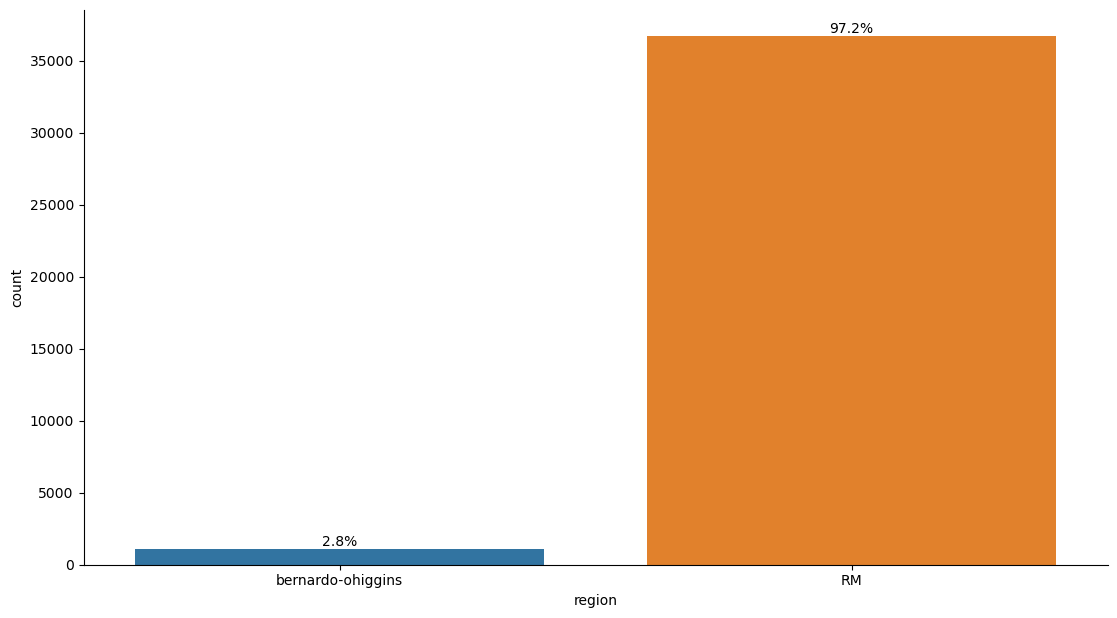

In [17]:
text_plot=['{:.1f}%'.format(round(df['region'].value_counts()[1]*100/df.count()[6],2)),
            '{:.1f}%'.format(round(df['region'].value_counts()[0]*100/df.count()[6],2))]

g=sns.catplot(data=df, x="region", kind="count", palette="tab10")
g.fig.set_size_inches(15, 8)
g.fig.subplots_adjust(top=0.81, right=0.86)
ax = g.facet_axis(0, 0)

# itera dentro de los contenedores
for c in ax.containers:
    labels = text_plot
    ax.bar_label(c, labels=labels, label_type='edge')

plt.show()

### 2.4.2

Este histograma nos muestra que de los tipos de inmuebles (casa y depa), un 53,9% pertenecen a la categoría depa y un 46,1% pertenece a la categoría casa

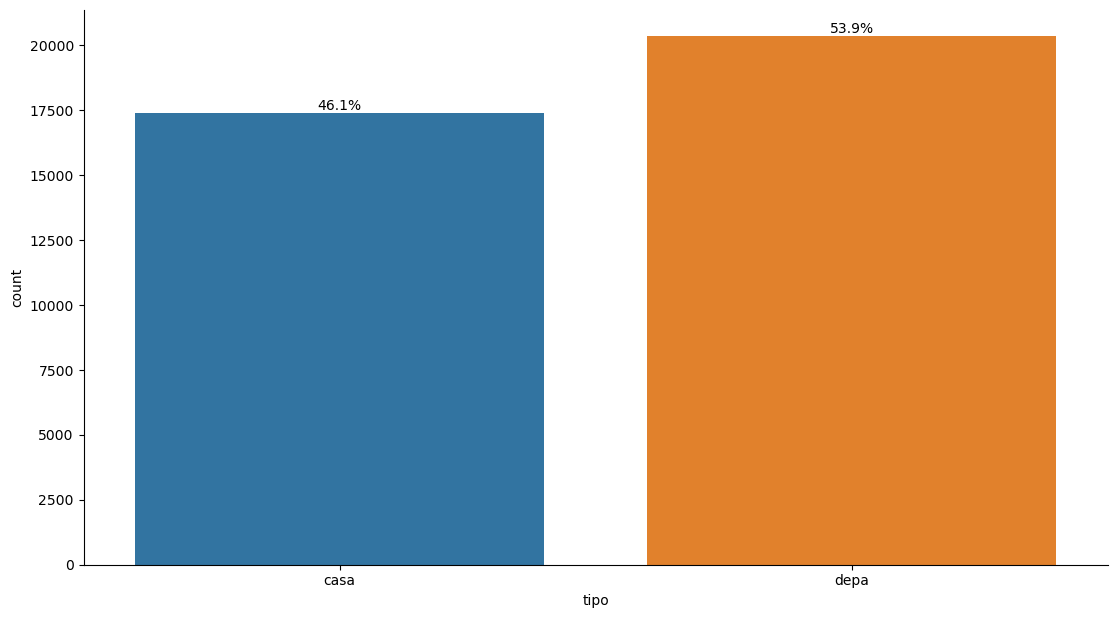

In [18]:
text_plot=['{:.1f}%'.format(round(df['tipo'].value_counts()[1]*100/df.count()[7],2)),
            '{:.1f}%'.format(round(df['tipo'].value_counts()[0]*100/df.count()[7],2))]

g=sns.catplot(data=df, x="tipo", kind="count", palette="tab10")
g.fig.set_size_inches(15, 8)
g.fig.subplots_adjust(top=0.81, right=0.86)
ax = g.facet_axis(0, 0)

# itera dentro de los contenedores
for c in ax.containers:
    labels = text_plot
    ax.bar_label(c, labels=labels, label_type='edge')
    
plt.show()

### 2.4.3
A través de este boxplot o gráfico de cajas, podemos ver que el precio medio de las casas es más elevado que el precio medio de los departamentos. También podemos obtener otro tipo de información: como que los valores mínimos y máximos de las casas y departamentos son similares, y que por la desviación estándar que vemos asociada a la media, es posible encontrar encontrar departamentos y casas con distintos precios, no está tan acotado el rango de precios.

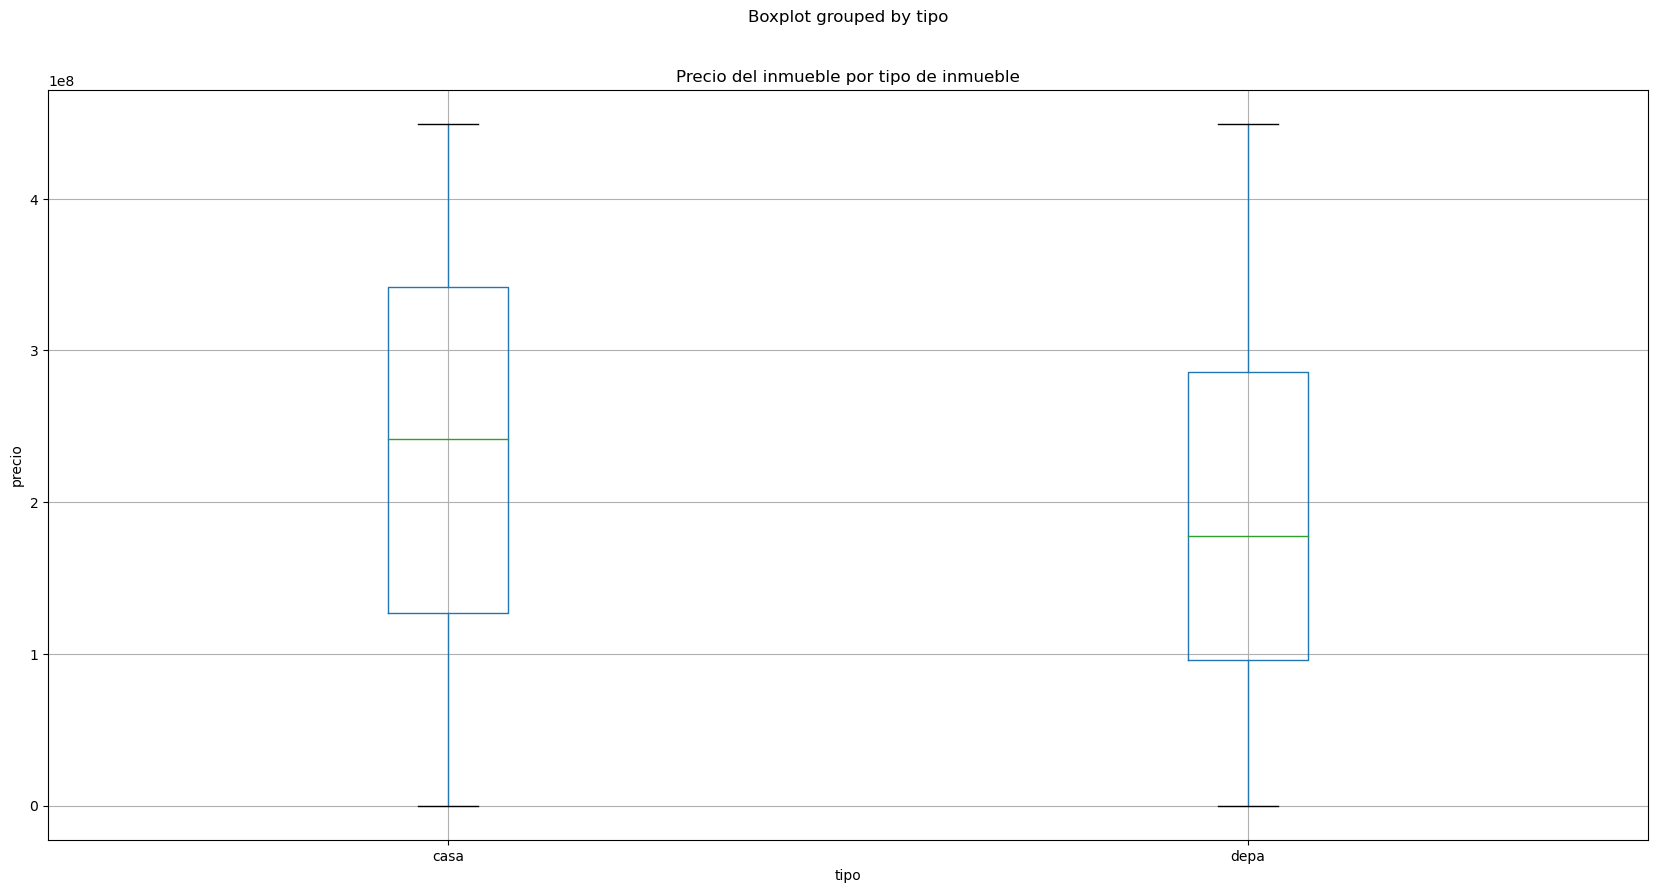

In [19]:
df.boxplot(by="tipo", column="precio_f", figsize=(20,10)).set_ylabel("precio")
plt.title("Precio del inmueble por tipo de inmueble")
plt.show()


### 2.4.4
Aunque no tenemos muchos datos de la región de Bernando Ohiggins en comparación a RM, vemos que la media de precios de la región de Bernardo Ohiggins, se sitúa un poco por debajo que la media de precios de RM

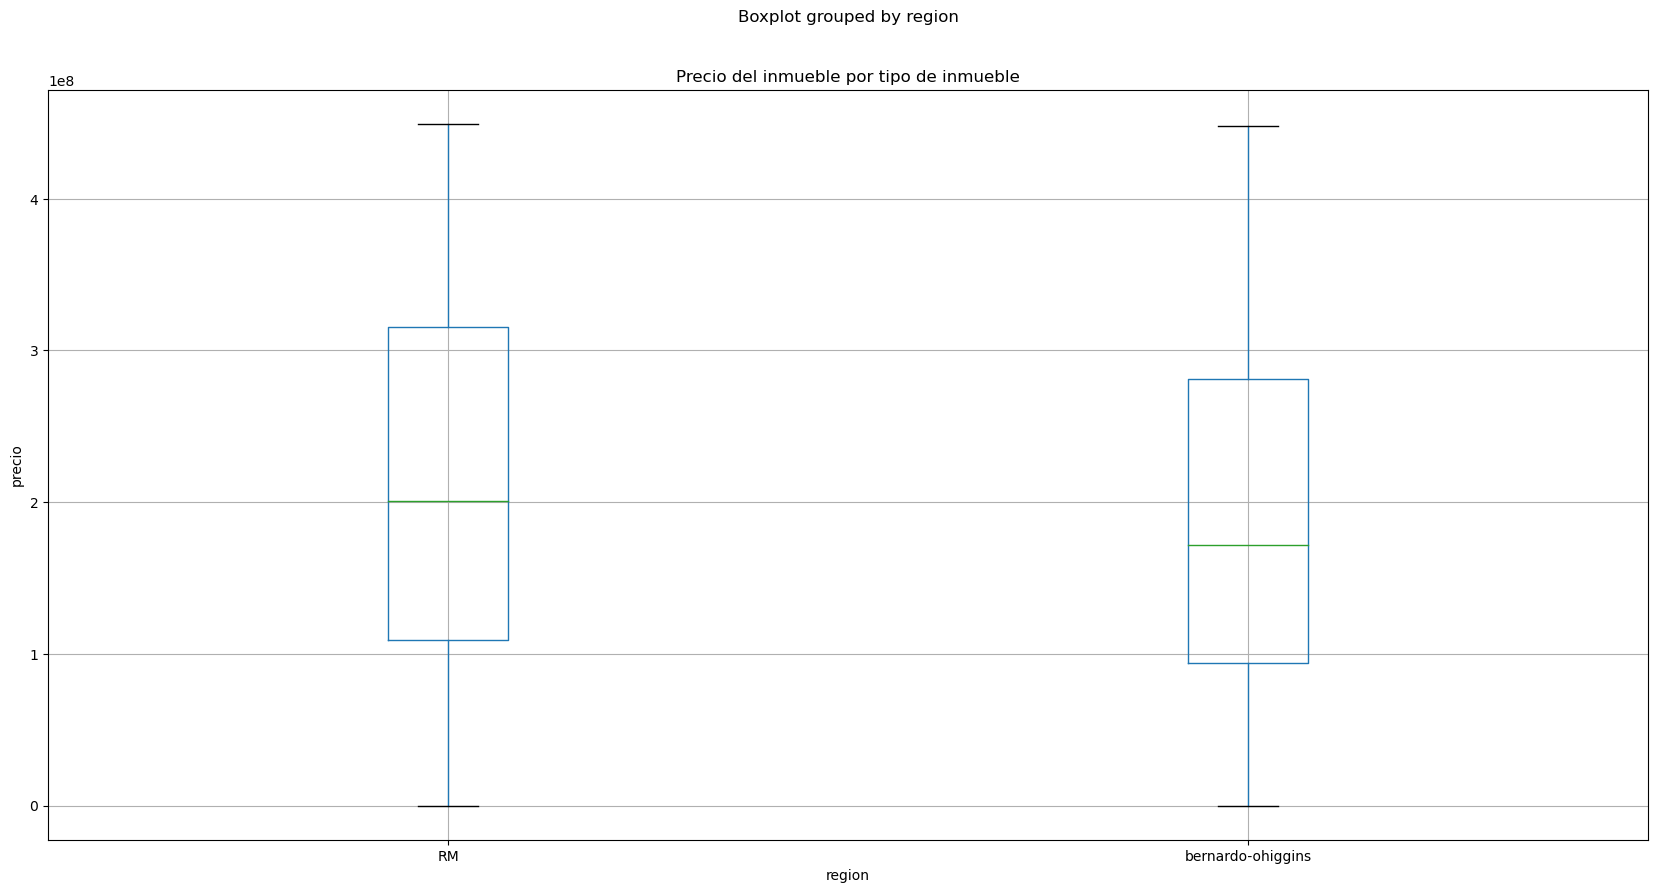

In [20]:
df.boxplot(by="region", column="precio_f", figsize=(20,10)).set_ylabel("precio")
plt.title("Precio del inmueble por tipo de inmueble")
plt.show()

### 2.4.5
Primero recordar que el valor 0 son los valores NaN, por lo que no se consideran para el análisis. En segundo lugar, podemos ver cómo la media de precios aumenta en relación a la cantidad de baños. Si bien pareciera algo intuitivo, el hecho de confirmarlo estadísticamente con un gráfico de cajas, afirma que esa hipótesis es correcta. Por último para 1 baño, existen gran cantidad de valores atípicos. 

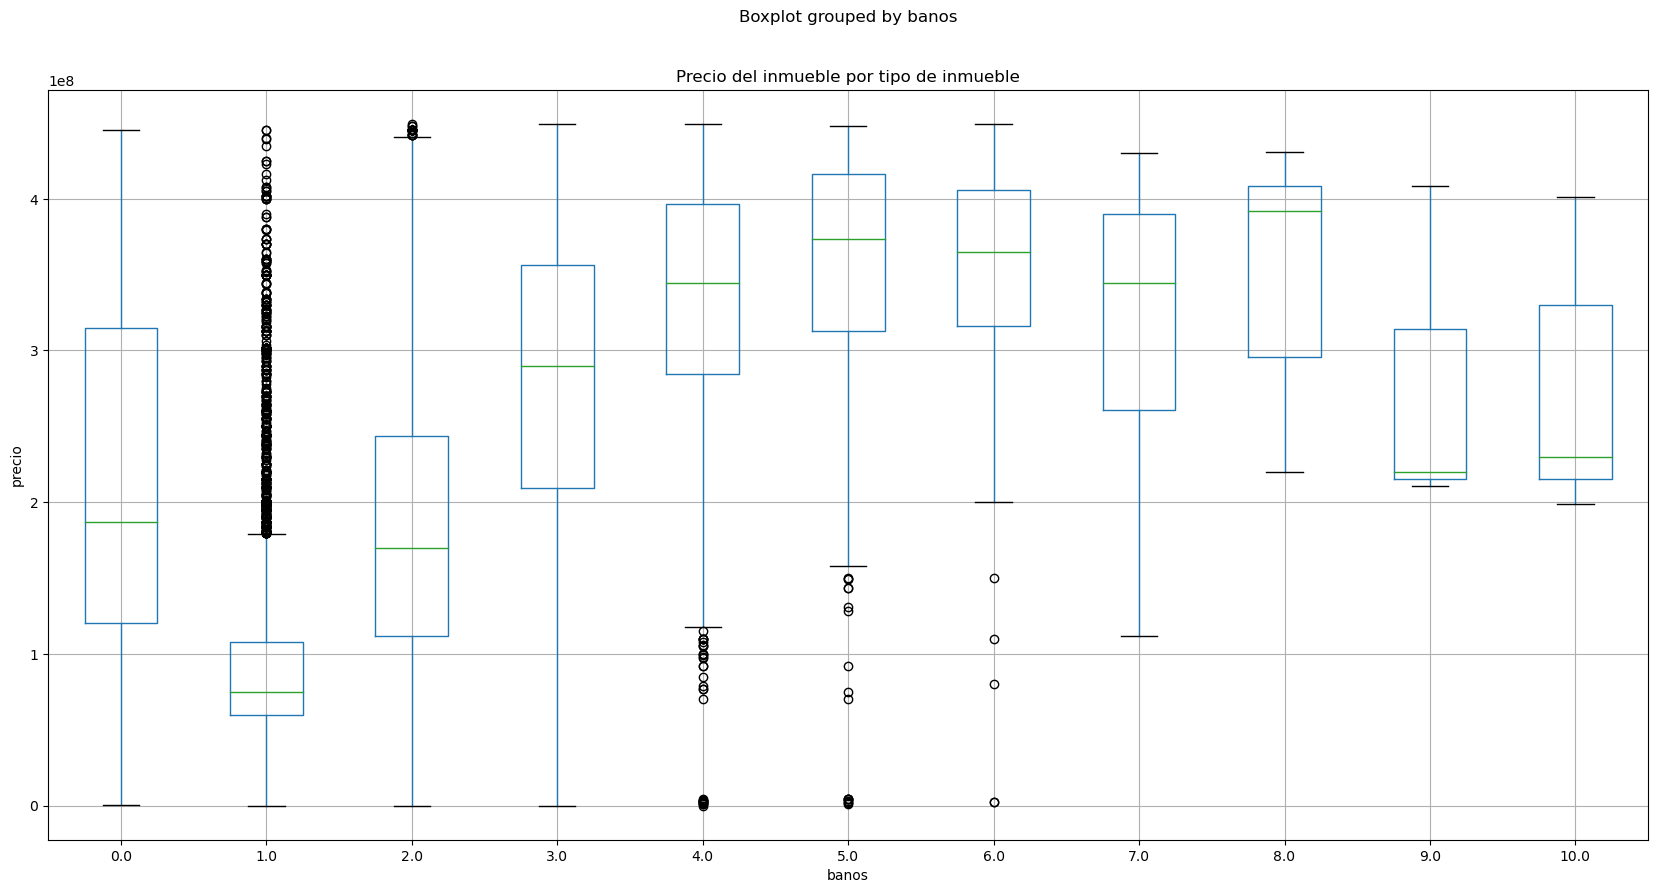

In [21]:
df.boxplot(by="banos", column="precio_f", figsize=(20,10)).set_ylabel("precio")
plt.title("Precio del inmueble por tipo de inmueble")
plt.show()

### 2.4.5
Podemos ver que en el siguiente histograma hay un tendencia: entre más colegio haya a 1 km a la redonda, disminuye el precio de la vivienda (correlación negativa), hasta el valor 10 que aumenta de nuevo. Para este caso no es posible asegurar el motivo de esto debido a que se carece de información respecto al tema.

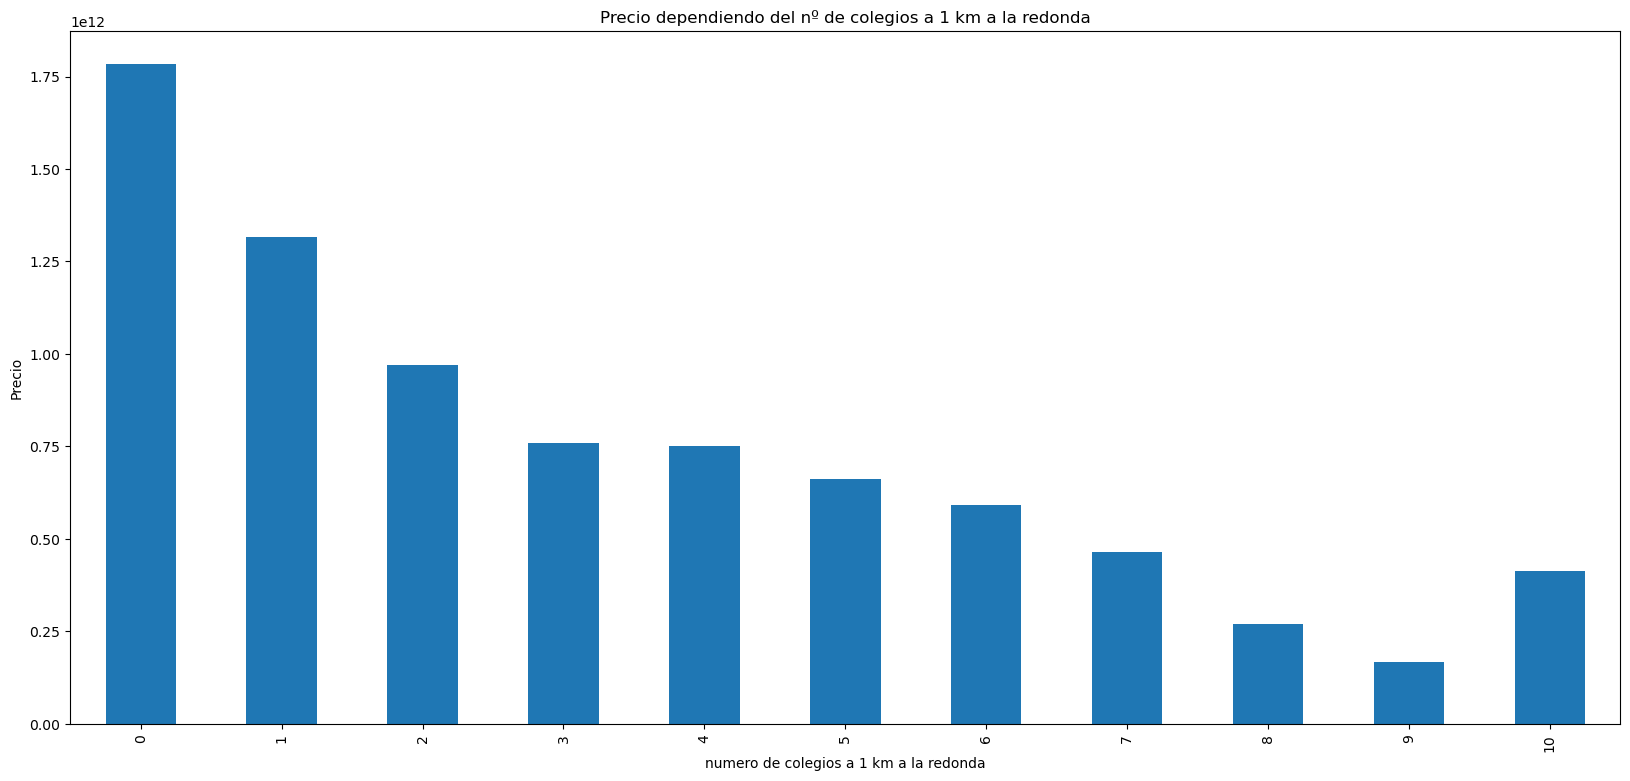

In [22]:
df_groups1=df.groupby('n_col')['precio_f'].sum()
plt.figure()
df_groups1.plot(kind='bar')
bar_plot=df_groups1.plot(kind='bar', title='Precio dependiendo del nº de colegios a 1 km a la redonda' ,ylabel='Precio', xlabel='numero de colegios a 1 km a la redonda', figsize=(20,9))
plt.show()

### 2.4.6
En el siguiente histograma podemos ver que los precios no varían mucho en contexto de número de farmacias a 1 km a la redonda (correlación negativa),  excepto para los valores 6,7,8 y 9

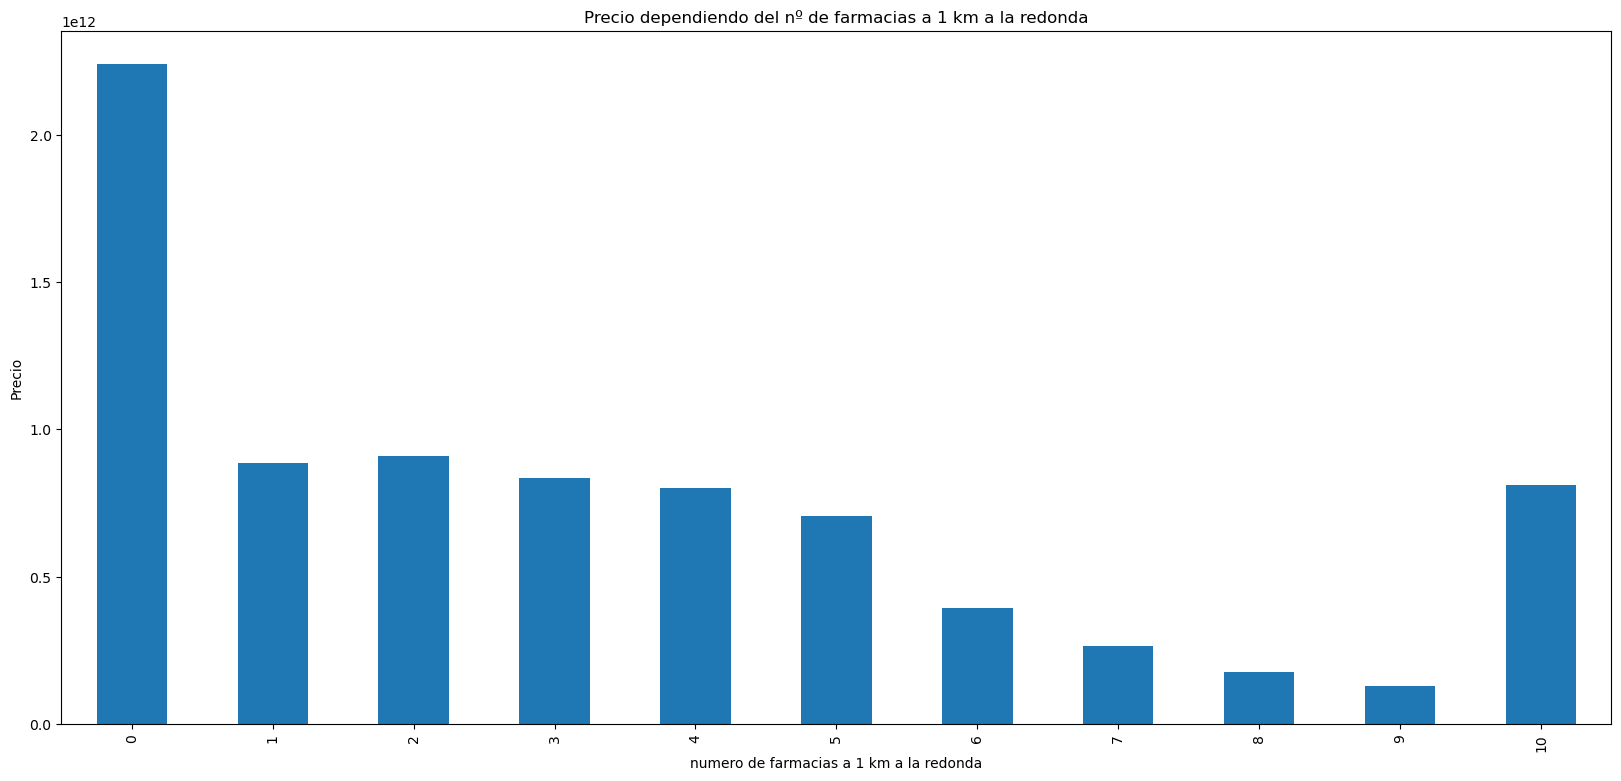

In [23]:
df_groups1=df.groupby('n_farm')['precio_f'].sum()
plt.figure()
df_groups1.plot(kind='bar')
bar_plot=df_groups1.plot(kind='bar', title='Precio dependiendo del nº de farmacias a 1 km a la redonda' ,ylabel='Precio', xlabel='numero de farmacias a 1 km a la redonda', figsize=(20,9))
plt.show()


### 2.4.7 
El siguiente es un histograma de frecuencias para el precio. Podemos ver que en su mayoría, se venden inmuebles cercanos a los 100000000.

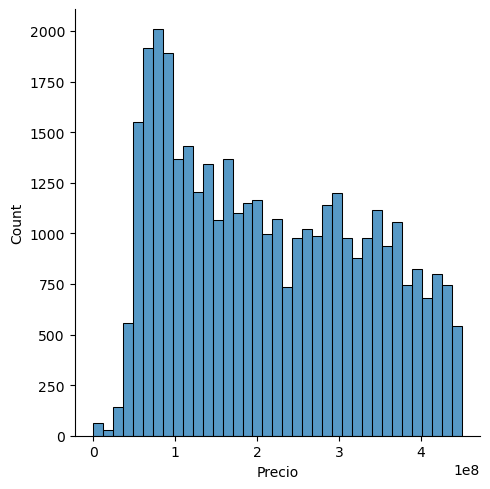

In [24]:
sns.displot(df, x=df['precio_f'], kind="hist")
plt.xlabel("Precio")
plt.show()

### 2.4.8
Gráfico de cajas: Dormitorios vs precio. Podemos ver que se confirma algo intuitivo: entre más dormitorios haya, la media de precios va aumentando. Aunque entre los valores 7 y 12 los valores varían.

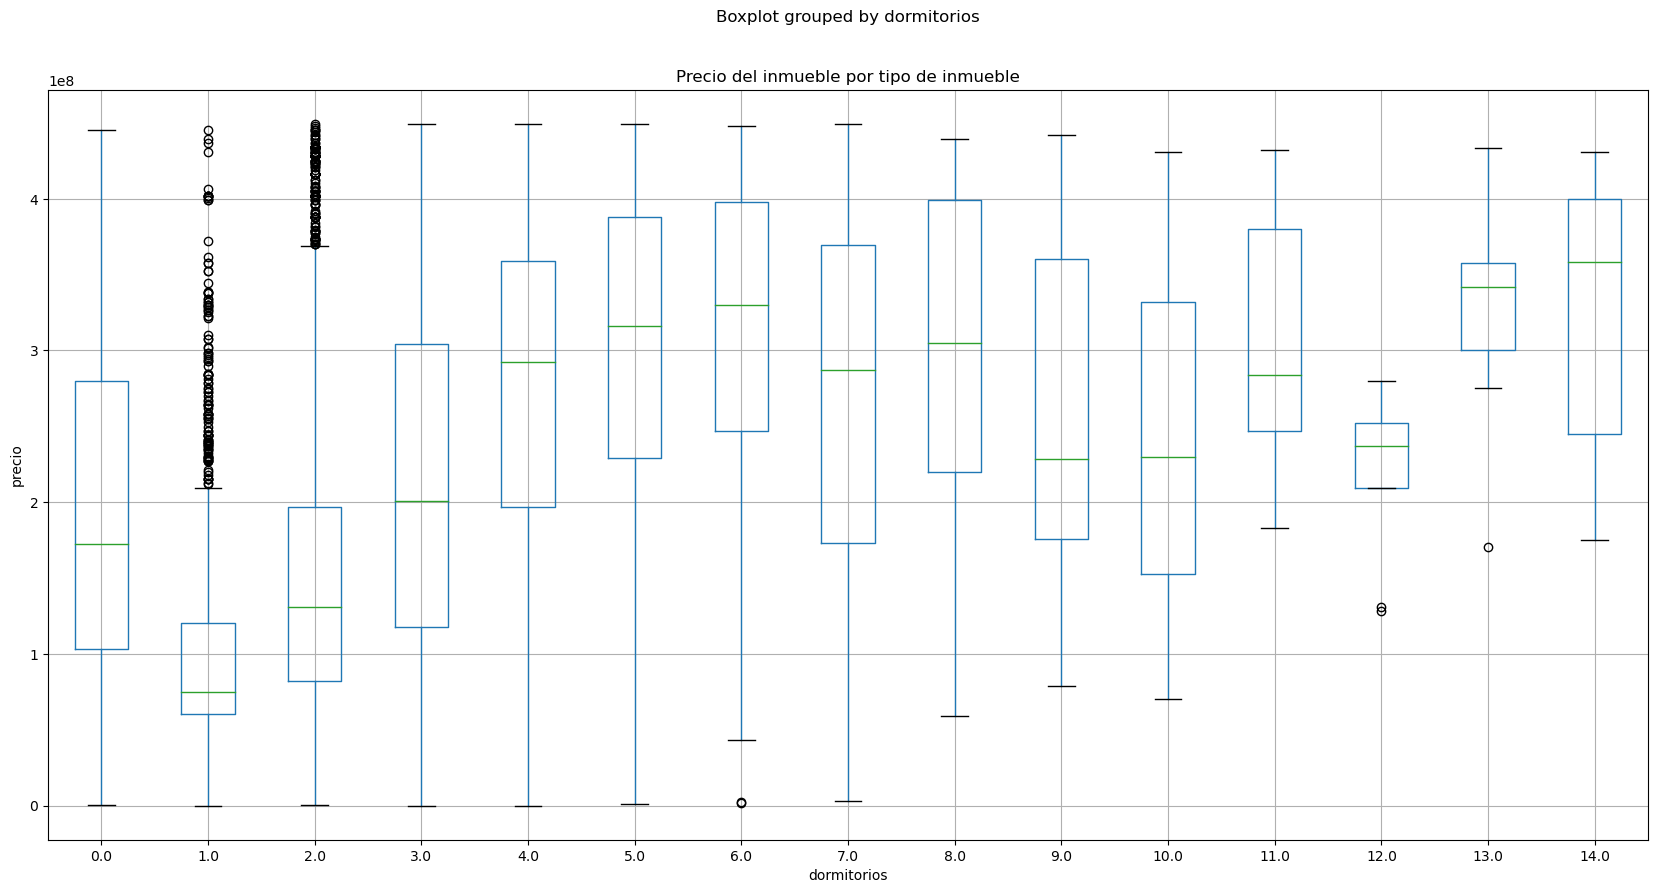

In [25]:
df.boxplot(by="dormitorios", column="precio_f", figsize=(20,10)).set_ylabel("precio")
plt.title("Precio del inmueble por tipo de inmueble")
plt.show()

### 2.4.9

Histograma de dormitorios

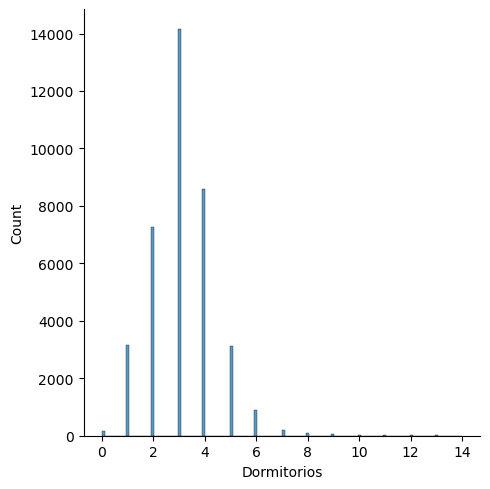

In [26]:
sns.displot(df, x=df['dormitorios'], kind="hist")
plt.xlabel("Dormitorios")
plt.show()

### 2.4.10

Histograma de baños

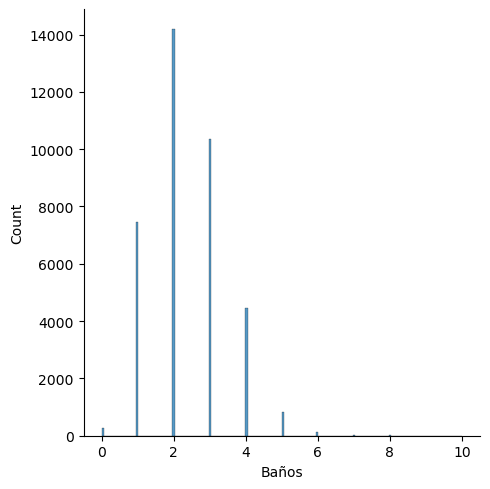

In [27]:
sns.displot(df, x=df['banos'], kind="hist")
plt.xlabel("Baños")
plt.show()

En el histograma 2.4.9 podemos ver que la mayoría de inmuebles tiene 3 dormitorios y en el histograma 2.4.10 que la mayoría de inmuebles tiene 2 baños. Por lo que los más vendidos son inmuebles que tienen 3 dormitorios y 2 baños, seguidos de los que tienen 2 o 4 dormitorios con 1 o 3 baños

## 3. Definición muestra

Definir de acuerdo lo inspeccionado anteriormente cual será su muestra final posterior a los filtros pertinentes y a su estrategia de validación que utilizarán para el modelo a estimar. Argumentar las decisiones tomadas en este punto.


### 3.1 
Para ver nuestra muestra final, eliminaremos las variables categóricas 'tipo' y 'region' debido a que las cambiamos a tipo numérico anteriormente en 2.1. De esta manera solo tendremos variables del tipo numéricas.

In [28]:
df=df.drop(columns=['region','tipo'])
df.head()

,ID_LOCALIDAD,ID_DISTRITO,ID_COMUNA,lat,lng,precio_f,sup_total,sup_util,dormitorios,banos,min_dist_col,n_col,mean_dist_col,min_dist_farm,n_farm,mean_dist_farm,RH_PERLLEG4,CNV_MONPAGVIVP,CNH_INGTOTP,CNRH_INGOCUP,tipo_num,region_num
0,6101011001,610101,6101,6.217611e+06,339568.959064,410000000.0,5000.0,180.0,4.0,2.0,89.873939,10,525.003210,112.960689,10,409.401279,0.002729,182798.16,1025098.46,588102.78,1,0
1,6101011001,610101,6101,6.217611e+06,339569.178969,186657380.0,3850.0,260.0,4.0,3.0,90.242446,10,525.044718,113.333612,10,409.654368,0.002729,182798.16,1025098.46,588102.78,1,0
2,6101031001,610103,6101,6.217980e+06,338698.268899,35000000.0,120.0,98.0,3.0,1.0,621.683357,5,771.829938,112.930782,10,575.718592,0.004479,158218.36,759789.81,373339.76,1,0
3,6101031001,610103,6101,6.217980e+06,338698.268899,55000000.0,110.0,100.0,4.0,2.0,621.683357,5,771.829938,112.930782,10,575.718592,0.004479,158218.36,759789.81,373339.76,1,0
4,6101031001,610103,6101,6.218012e+06,338689.990298,272806940.0,1100.0,169.0,4.0,2.0,632.800837,5,787.188282,114.359442,10,619.686775,0.004479,158218.36,759789.81,373339.76,1,0


### 3.2
Ahora que tenemos variables numéricas, podemos obtener más información de los datos por medio del análisis de componentes principales (PCA, por sus siglas en inglés) y la matriz de correlaciones:

### 3.2.1 
Analizaremos la matriz de correlaciones. Para entrar en contexto, es una matriz simétrica en su diagonal. Los valores de las correlaciones van de -1 a 1, siendo -1 y 1 valores donde se correlacionan las variables linealmente y 0 donde no se correlacionan linealmente. De todas las variables, y siguiendo con el objetivo principal, nos situaremos en la fila 'precio_f' e iremos viendo las columnas que poseen mayor correlacion (valores cercanos a 1 y -1).Estos serían:

* lat: 0.22
* lng: 0.21
* dormitorios: 0.48
* banos: 0.66
* min_dist_col: 0.23
* n_col: -0.44
* mean_dist_col: -0.21
* n_farm: -0.24
* RH_PERLLEG4: 0.58
* CNV_MONPAGVIVP: 0.61
* CNH_INGTOTP: 0.60
* CNRH_INGOCUP: 0.59

Si los histogramas 2.4.5 y 2.4.6 y lo comparamos con el valor dado en la correlación de 'n_farm' y 'n_col', estos dieron valores negativos debido a que existe una correlación negativa. 

Ahora surge la pregunta: ¿las otras columnas se pueden eliminar? Debido a la información que se posee para el problema, no se puede asegurar que no se perderá información en la predicción. Para hacerlo, se debe eliminar causalidad entra las variables para correlaciones bajas, de esta forma, nos aseguramos de que con menos variables, expliquemos los datos y se pueda predecir el mismo problema.


In [29]:
corr_matrix = df.corr()
display(corr_matrix)

,ID_LOCALIDAD,ID_DISTRITO,ID_COMUNA,lat,lng,precio_f,sup_total,sup_util,dormitorios,banos,min_dist_col,n_col,mean_dist_col,min_dist_farm,n_farm,mean_dist_farm,RH_PERLLEG4,CNV_MONPAGVIVP,CNH_INGTOTP,CNRH_INGOCUP,tipo_num,region_num
ID_LOCALIDAD,1.000000,1.000000,1.000000,0.803081,0.393360,0.042648,-0.004029,-0.011473,-0.079447,-0.034728,-0.043827,0.083855,0.083314,-0.031335,0.102756,0.112890,0.144406,0.190338,0.158271,0.147977,-0.143024,0.996592
ID_DISTRITO,1.000000,1.000000,1.000000,0.803081,0.393360,0.042648,-0.004029,-0.011473,-0.079447,-0.034728,-0.043827,0.083855,0.083314,-0.031335,0.102756,0.112890,0.144406,0.190338,0.158271,0.147977,-0.143024,0.996592
ID_COMUNA,1.000000,1.000000,1.000000,0.803085,0.393360,0.042659,-0.004028,-0.011473,-0.079442,-0.034719,-0.043824,0.083845,0.083307,-0.031333,0.102750,0.112884,0.144414,0.190347,0.158279,0.147984,-0.143021,0.996591
lat,0.803081,0.803081,0.803085,1.000000,0.450089,0.221906,0.000689,-0.008539,-0.067129,0.070009,0.034804,-0.033811,0.024366,-0.049066,0.102805,0.104812,0.330965,0.372043,0.302750,0.324933,-0.200942,0.814938
lng,0.393360,0.393360,0.393360,0.450089,1.000000,0.212333,-0.032701,-0.006770,-0.060563,0.023145,0.071639,0.035161,0.175352,0.045340,0.106933,0.201907,0.358508,0.484666,0.492086,0.468806,-0.250537,0.433064
precio_f,0.042648,0.042648,0.042659,0.221906,0.212333,1.000000,0.021027,0.045418,0.477289,0.657716,0.231694,-0.438404,-0.214181,0.131531,-0.235174,-0.103227,0.575278,0.608036,0.597095,0.585936,0.174801,0.035201
sup_total,-0.004029,-0.004029,-0.004028,0.000689,-0.032701,0.021027,1.000000,0.077481,0.016889,0.025127,0.009409,-0.022117,-0.020013,-0.004834,-0.022728,-0.026093,-0.010255,-0.005384,-0.013349,-0.014302,0.026539,-0.007584
sup_util,-0.011473,-0.011473,-0.011473,-0.008539,-0.006770,0.045418,0.077481,1.000000,0.024085,0.033351,0.025336,-0.027073,-0.017113,0.000797,-0.018360,-0.016204,0.013798,0.015643,0.016373,0.013614,0.014020,-0.012764
dormitorios,-0.079447,-0.079447,-0.079442,-0.067129,-0.060563,0.477289,0.016889,0.024085,1.000000,0.662788,0.115584,-0.281859,-0.198594,0.205641,-0.366641,-0.177587,0.007377,0.069556,0.087228,0.005024,0.521529,-0.097251
banos,-0.034728,-0.034728,-0.034719,0.070009,0.023145,0.657716,0.025127,0.033351,0.662788,1.000000,0.195563,-0.418114,-0.277057,0.138890,-0.314434,-0.209053,0.245040,0.279292,0.280539,0.235786,0.309648,-0.054006


### 3.2.2 
PCA (análisis de componentes principales)


Por medio del método PCA, podemos ver algo interesante, y es que nos dice que con 1 componente principal se puede explicar el 97,8% de todos los datos. Esto es importante, debido a que nos otorga información sobre cómo están descritos los datos, y para este caso, todas las columnas nos entregan datos distribuidos de la misma forma. Si bien esto nos otorga un poco más de libertad para eliminar más columnas con datos sin afectar en la predicción, siguiendo con el mismo argumento mencionado anteriormente, podría existir causalidad entre el precio y alguna variable que se quiera eliminar. Por lo que nos quedaremos con la muestra con datos mencionada en 3.1

In [30]:
df_new = df[np.isfinite(df).all(1)]
pca = PCA(n_components=22)
pca.fit(df_new)
display(pca.explained_variance_ratio_)

array([9.78772149e-01, 2.12264553e-02, 1.36281185e-06, 2.83325193e-08,
       3.26003893e-09, 1.52101321e-09, 6.00646931e-11, 4.55879287e-11,
       3.22252828e-12, 1.31995884e-13, 9.97011770e-14, 1.45472304e-14,
       1.08776984e-14, 9.60005655e-18, 5.87009110e-18, 1.81522616e-18,
       5.52289889e-19, 1.64569072e-19, 4.15277112e-21, 7.06991285e-23,
       4.32778611e-23, 2.50677274e-23])

### 3.3
Estrategia de validación: Las estrategias para validar nuestra muestra fueron mencionadas en 2.3, 3.1 y 3.2: se eliminaron las columnas que poseían en su mayoría valores NaN, ya que no aportaban información al problema ('antiguedad' y 'bogedas'). Se eliminó 'descripcion' debido a que no se posee información para verificar la validez de ese texto. También se cambiaron las variables categóricas 'tipo' y 'region' por numéricas y se eliminaron las variables categóricas. Finalmente se elimino 'direccion' debido a que está contenida en de forma numérica en las columnas ID_LOCALIDAD, ID_DISTRITO, ID_COMUNA, lat y lng. 'direccion' se pudo haber pasado a dummy, pero si se hacía eso, no se podría haber obtenido la información en la matriz de correlacion ni haber usado PCA, debido a que estos dos métodos perderían interpretabilidad. Se decidió no eliminar más columnas porque se podría perder causalidad entre el precio y alguna otra variable, afectando la predicción final.

## 4. Estimación de modelo

Elección de la metodología de modelamiento y su razón. Estimar el modelo


### 4.1 

Debido a que el objetivo es predecir precios (problema de regresión) y no clasificarlos, usaremos modelos de regresión y veremos cuál de estos modelos tiene un mejor rendimiento, para luego quedarnos con el mejor para nuestro conjunto de datos según nuestra métrica de error.  Dentro de todos los posibles modelos, elegiremos un modelo de clasificación lineal, debido a que la matriz de correlacion nos confirma linealidad entre las variables y otros modelos de ensemble. La columna a predecir es 'precio_f' y se dividirán los datos entre un 80% de datos de entrenamiento y un 20% de datos de test o prueba. Además se puso un valor numérico en "random_state" para tener resultados reproducibles.Quedando de la siguiente manera:

In [31]:
from sklearn.model_selection import train_test_split

Y= df_new.iloc[:,5]
x=df_new.iloc[:,df_new.columns !='precio_f']
X_train,X_test,y_train,y_test= train_test_split(x,Y, test_size=0.2, random_state=40)

### 4.2
Se cargan las librerías junto con los modelos de regresión y luego se evaluará cuál de los modelos tuvo mejor rendimiento (se optó por un conjunto de modelos debido a que cada conjunto de datos es distinto, por lo que usar un repertorio de modelos para ver cuál tuvo mejor rendimiento, es mejor que probar sólo con 1 modelo).

In [32]:
from sklearn.linear_model import LinearRegression
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor

### 4.2.1 
Modelo: LinearRegression

In [33]:
regressor= LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

### 4.2.2
Modelo: GradientBoostingRegressor

In [34]:
gbr= GradientBoostingRegressor()
gbr.fit(X_train,y_train)

GradientBoostingRegressor()

### 4.2.3
Modelo: XGBRegressor

In [35]:
xgb= XGBRegressor()
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

### 4.2.4
Modelo: LGBMRegressor

In [36]:
lgb= LGBMRegressor()
lgb.fit(X_train,y_train)

LGBMRegressor()


## 5. Evaluación del modelo

Elección de las métricas a utilizar para evaluar el rendimiento del modelo asi como la justificación de la elección de métricas utilizadas.


### 5.1.1
Las métricas escogidsa fueron R2 y explained variance score: la primera muestra qué tan bien los datos se ajustan a una curva o línea, y la segunda nos dice qué tanta varianza hay entre el valor real y que se predice, en este caso se esperan valores cercanos a 1 para mejores predicciones. Se escogieron estas métricas porque es un problema de regresión. Ahora se carga la métrica r2_score y luego explained variance score, y luego ver el error en los modelos:

Métrica R2

In [37]:
from sklearn.metrics import r2_score

In [38]:
y_pred_lr=regressor.predict(X_test)
f"El valor de la métrica r2_score para LinearRegression es: {r2_score(y_test, y_pred_lr):.3}" 

'El valor de la métrica r2_score para LinearRegression es: 0.745'

In [39]:
f"Por lo que el error para LinearRegression es: {1-r2_score(y_test, y_pred_lr):.3}" 

'Por lo que el error para LinearRegression es: 0.255'

In [40]:
y_pred_gbr=gbr.predict(X_test)
f"El valor de la métrica r2_score para GradientBoostingRegressor es: {r2_score(y_test, y_pred_gbr):.3}" 

'El valor de la métrica r2_score para GradientBoostingRegressor es: 0.899'

In [41]:
f"Por lo que el error para GradientBoostingRegressor es: {1-r2_score(y_test, y_pred_gbr):.3}" 

'Por lo que el error para GradientBoostingRegressor es: 0.101'

In [42]:
y_pred_xgb=xgb.predict(X_test)
f"El valor de la métrica r2_score para XGBRegressor es: {r2_score(y_test, y_pred_xgb):.3}" 

'El valor de la métrica r2_score para XGBRegressor es: 0.92'

In [43]:
f"Por lo que el error para XGBRegressor es: {1-r2_score(y_test,  y_pred_xgb):.3}" 

'Por lo que el error para XGBRegressor es: 0.0805'

In [44]:
y_pred_lgb=lgb.predict(X_test)
f"El valor de la métrica r2_score para LGBMRegressor es: {r2_score(y_test, y_pred_lgb):.3}" 

'El valor de la métrica r2_score para LGBMRegressor es: 0.915'

In [45]:
f"Por lo que el error para LGBMRegressor es: {1-r2_score(y_test,  y_pred_lgb):.3}" 

'Por lo que el error para LGBMRegressor es: 0.0846'

### 5.2.1
Métrica R2 ajustado

In [46]:
from sklearn.metrics import explained_variance_score

In [47]:
f"El valor de la métrica explained variance score para LinearRegression es: {explained_variance_score(y_test, y_pred_lr):.3}"

'El valor de la métrica explained variance score para LinearRegression es: 0.745'

In [48]:
f"El valor de la métrica explained variance score para GradientBoostingRegressor es: { explained_variance_score(y_test,y_pred_gbr):.3}"

'El valor de la métrica explained variance score para GradientBoostingRegressor es: 0.899'

In [49]:
f"El valor de la métrica explained variance score para XGBRegressor es: {explained_variance_score(y_test,y_pred_xgb):.3}" 

'El valor de la métrica explained variance score para XGBRegressor es: 0.92'

In [50]:
f"El valor de la métrica explained variance score paraLGBMRegressor es: {explained_variance_score(y_test,y_pred_lgb):.3}" 

'El valor de la métrica explained variance score paraLGBMRegressor es: 0.915'

Tanto R2 score como explained variance score dan resultados similares debido a que ambos hacen una comparación entre el modelo generado para los datos y el valor real de los datos (estima la varianza)

### 5.2

Debido a que según R2 y explained variance score, las métricas de errores dieron a XGBRegressor como mejor modelo para estos datos, ahora usamos el atributo 'feature_importances_' para poder ver la importancia de las variables, debido a que XGBRegressor es un regresor de árboles. De esta manera se puede entender el modelamiento de los datos con XGBRegressor y visualizar cuáles variables considera más importantes.


In [51]:
xgb.feature_importances_

array([0.00460664, 0.        , 0.        , 0.01269339, 0.00614115,
       0.05837225, 0.32505235, 0.00546069, 0.0480754 , 0.00284573,
       0.00418877, 0.00360465, 0.00412357, 0.00532538, 0.00425154,
       0.14227177, 0.3239111 , 0.00608464, 0.03296332, 0.01002761,
       0.        ], dtype=float32)

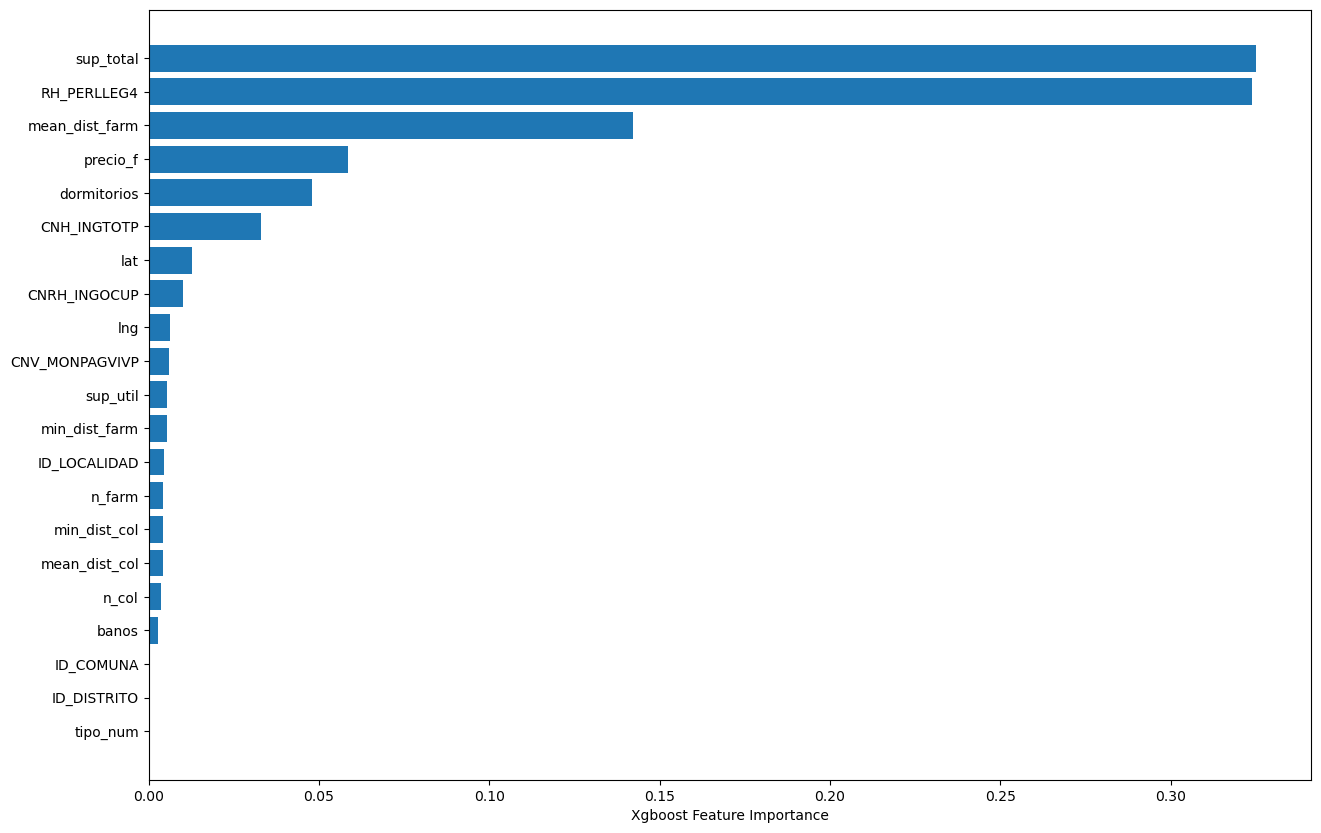

In [52]:
sorted_idx = xgb.feature_importances_.argsort()
plt.figure(figsize=(15,10))
plt.barh(df_new.columns[sorted_idx], xgb.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")
plt.show()

### 5.3 
Simulación: Una vez elegido el modelo con menor error ( XGBRegressor), se copiaron valores de X_train de tal forma de crear una combinación única de valores, para ponerse en una situación que entren nuevos datos a nuestra base.

In [53]:
pred_list=[6101031001,1313202,13108,6303911.66786266,354998.17609585,100.0,96.0,2.0,1.0,252.941960097117,10,612.710078272358,287.329603388256,2,477.67486069375,0.0131719473122108,277600.94,1850549.35,920407.94,1,1]
a = np.array(pred_list)
a = np.expand_dims(a, 0)

xgb.predict(a)
f"La predicción de la simulación de XGBRegressor para el precio es: {xgb.predict(a)[0]:.3}, con un error del {((1-r2_score(y_test,  y_pred_xgb))*100):.3}% para la métrica R2 y {((1-explained_variance_score(y_test,y_pred_xgb))*100):.3}% para la métrica explained variance score" 

'La predicción de la simulación de XGBRegressor para el precio es: 1.99e+08, con un error del 8.05% para la métrica R2 y 8.04% para la métrica explained variance score'

Viendo los resultados de la métrica r2_score y explained variance score, dos modelos fueron los que tuvieron las mejores métricas para este conjunto de datos: XGBRegressor y LGBMRegressor, teniendo un rendimiento levemente superior XGBRegressor.

## 6. Reflexiones finales

Reflexiones finales respecto al proceso de modelamiento, potenciales mejoras, bases adicionales interesantes que se podrían ocupar para generar nuevas variables, etc.


### 6.1

Reflexión final: Se comprobó que existe cierta linealidad con la matriz de correlación (aunque también sirve la matriz de covarianza), luego obtener nuestro dataframe con variables numéricas. Se optó por un repertorio de modelos de regresiones debido al contexto del problema, para ver cuál tuvo el mejor rendimiento para el conjunto de datos. Para nuestro caso fué XGBRegressor con un error en el ajuste lineal del 8.05%. Además, se realizó una simulación para un nuevo caso, dando como resultado un precio de  1.99e+08.

Como mejoras al trabajo realizado, existen más modelos de regresiones en Python y también en R. Se sugiere siempre leer la documentación de las librerías de machine learning (y deep learning) debido a que los modelos se van actualizando y se van agregando más a las librerías. Otra posible mejora sería tener más datos para la región de Bernardo-Ohiggins, de tal manera que las predicciones para esta región mejoren.